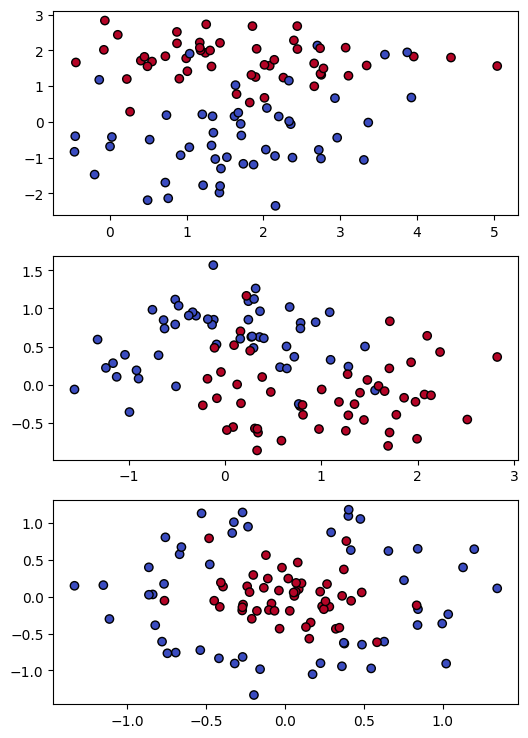

In [1]:
from sklearn.datasets import make_classification, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2,n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=100)
X += 1.2 * np.random.uniform(size = X.shape)
Xy = (X,y)

datasets = [Xy, make_moons(noise=0.3, random_state=42),
            make_circles(noise=0.2, factor=0.3, random_state= 42)]

fig = plt.figure(figsize = (6,9))
i = 1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    ax = fig.add_subplot(len(datasets), 1, i)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    i += 1
plt.show()

### 3.16 


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.inspection import DecisionBoundaryDisplay

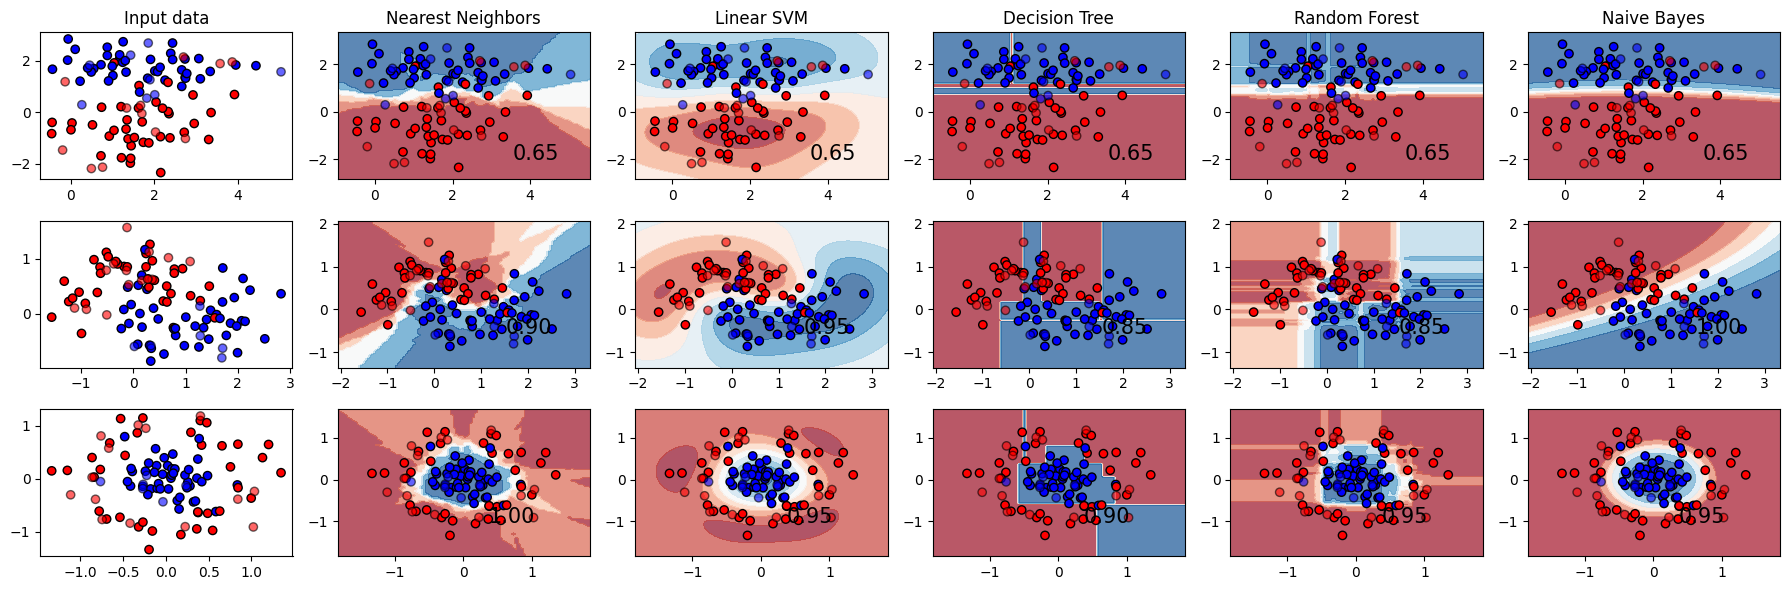

In [17]:
names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]

classifiers = [KNeighborsClassifier(), SVC(), 
               DecisionTreeClassifier(), RandomForestClassifier(), 
               GaussianNB()]

fig = plt.figure(figsize=(18, 6))
i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # plot testing data
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    i += 1

    for name, clf in zip(names, classifiers):
        ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
        
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=plt.cm.RdBu, alpha=0.7, ax=ax, eps=0.5)
       
        # plot training data
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        # plot testing data
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            X[:, 0].max() - 0.3, X[:, 1].min() + 0.3, f'{score:.2f}',
            size=15, horizontalalignment='right'
        )
        i += 1
plt.tight_layout()
plt.show()